In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('beer-servings.csv')

In [6]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [7]:
data.drop(['Unnamed: 0','country', 'continent'], axis = 1, inplace = True)

In [8]:
data.head(1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0


In [9]:
X = data.drop("total_litres_of_pure_alcohol", axis=1)
y = data["total_litres_of_pure_alcohol"]

In [10]:
X.isna().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6


In [11]:
X.fillna(X.mean(), inplace=True)

In [12]:
y.isna().sum()

np.int64(1)

In [13]:
y.fillna(y.mean(), inplace=True)

In [14]:
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Flatten

# add checkpoint


In [21]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "best_model.keras"
check_point = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

In [25]:
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 151.6727 - r2_score: -12.0379 - val_loss: 94.4685 - val_r2_score: -3.4600
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 82.9812 - r2_score: -6.6022 - val_loss: 45.6203 - val_r2_score: -1.1538
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 50.6180 - r2_score: -3.5365 - val_loss: 11.5086 - val_r2_score: 0.4567
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26.2632 - r2_score: -1.1050 - val_loss: 6.9358 - val_r2_score: 0.6726
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.1394 - r2_score: -0.1095 - val_loss: 10.1751 - val_r2_score: 0.5196
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.7951 - r2_score: -0.2907 - val_loss: 14.6518 - val_r2_score: 0.3083
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.5150 - r2_score: -0.0295 - val_loss: 15.0574 - val_r2_score: 0.2891
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1386 - r2_score: 0.1461 - val_los

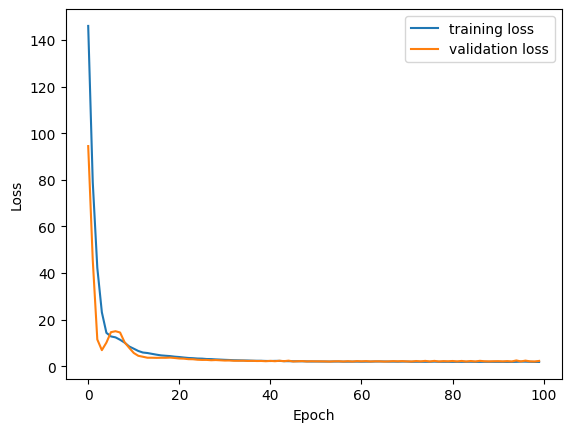

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
model.save('beer_model.keras')
sample_input = np.array([[1,2,3]])
sample_output = model.predict(sample_input)
print(sample_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.46951586]]


In [28]:
model

<Sequential name=sequential_2, built=True>